In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [2]:
import tensorflow as tf
print(tf.__version__)


2.10.0


In [3]:
!pip install plotly

In [4]:
# General Imports
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Building Model
from keras.utils import plot_model
from tensorflow.keras import models
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import legacy


# Training Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

# Model Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Data Processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import load_img

from sklearn.model_selection import train_test_split

In [5]:
import tensorflow as tf
import numpy as np
import random
import os
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

In [6]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

In [7]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [8]:
train_data = train_df('D:\Mahir\Datasets\Merged Dataset 2\Training')

In [9]:
train_data


,Class Path,Class
0,D:\Mahir\Datasets\Merged Dataset 2\Training\gl...,glioma
1,D:\Mahir\Datasets\Merged Dataset 2\Training\gl...,glioma
2,D:\Mahir\Datasets\Merged Dataset 2\Training\gl...,glioma
3,D:\Mahir\Datasets\Merged Dataset 2\Training\gl...,glioma
4,D:\Mahir\Datasets\Merged Dataset 2\Training\gl...,glioma
...,...,...
16983,D:\Mahir\Datasets\Merged Dataset 2\Training\pi...,pituitary
16984,D:\Mahir\Datasets\Merged Dataset 2\Training\pi...,pituitary
16985,D:\Mahir\Datasets\Merged Dataset 2\Training\pi...,pituitary
16986,D:\Mahir\Datasets\Merged Dataset 2\Training\pi...,pituitary


In [10]:
test_data = test_df('D:\Mahir\Datasets\Merged Dataset 2\Testing')

In [11]:
test_data

,Class Path,Class
0,D:\Mahir\Datasets\Merged Dataset 2\Testing\gli...,glioma
1,D:\Mahir\Datasets\Merged Dataset 2\Testing\gli...,glioma
2,D:\Mahir\Datasets\Merged Dataset 2\Testing\gli...,glioma
3,D:\Mahir\Datasets\Merged Dataset 2\Testing\gli...,glioma
4,D:\Mahir\Datasets\Merged Dataset 2\Testing\gli...,glioma
...,...,...
4322,D:\Mahir\Datasets\Merged Dataset 2\Testing\pit...,pituitary
4323,D:\Mahir\Datasets\Merged Dataset 2\Testing\pit...,pituitary
4324,D:\Mahir\Datasets\Merged Dataset 2\Testing\pit...,pituitary
4325,D:\Mahir\Datasets\Merged Dataset 2\Testing\pit...,pituitary


In [12]:
train_path = 'D:\Mahir\Datasets\Merged Dataset 2\Training'
test_path = 'D:\Mahir\Datasets\Merged Dataset 2\Testing'

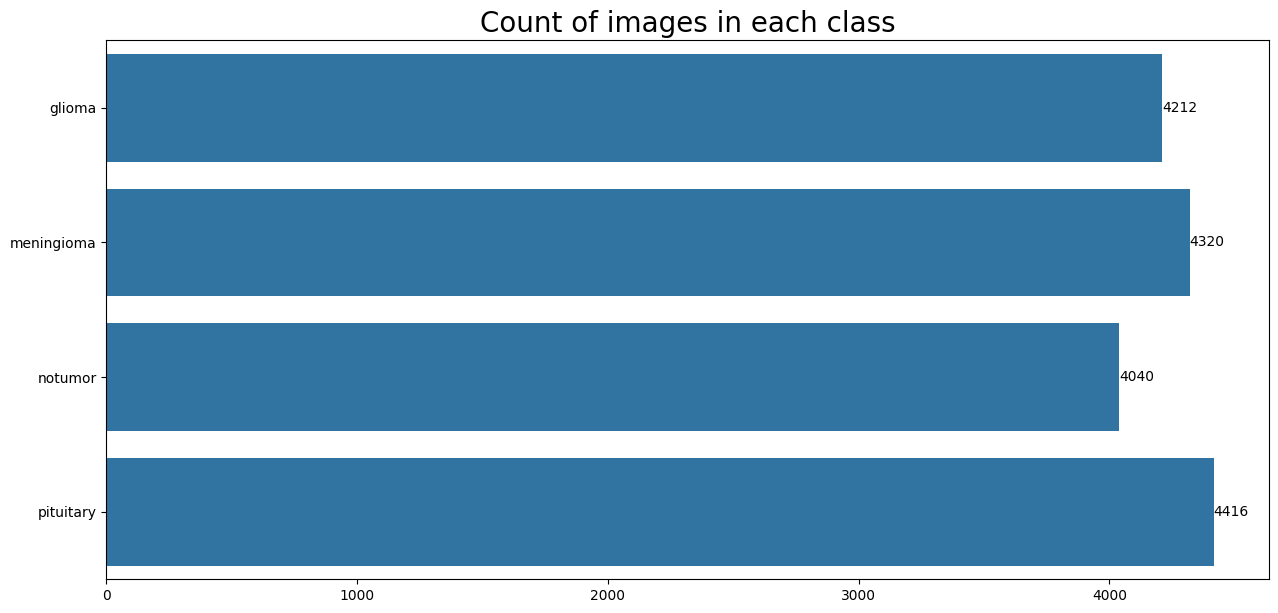

In [13]:
# Count of images in each class in train data
plt.figure(figsize=(15,7))
ax = sns.countplot(data=train_data , y=train_data ['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

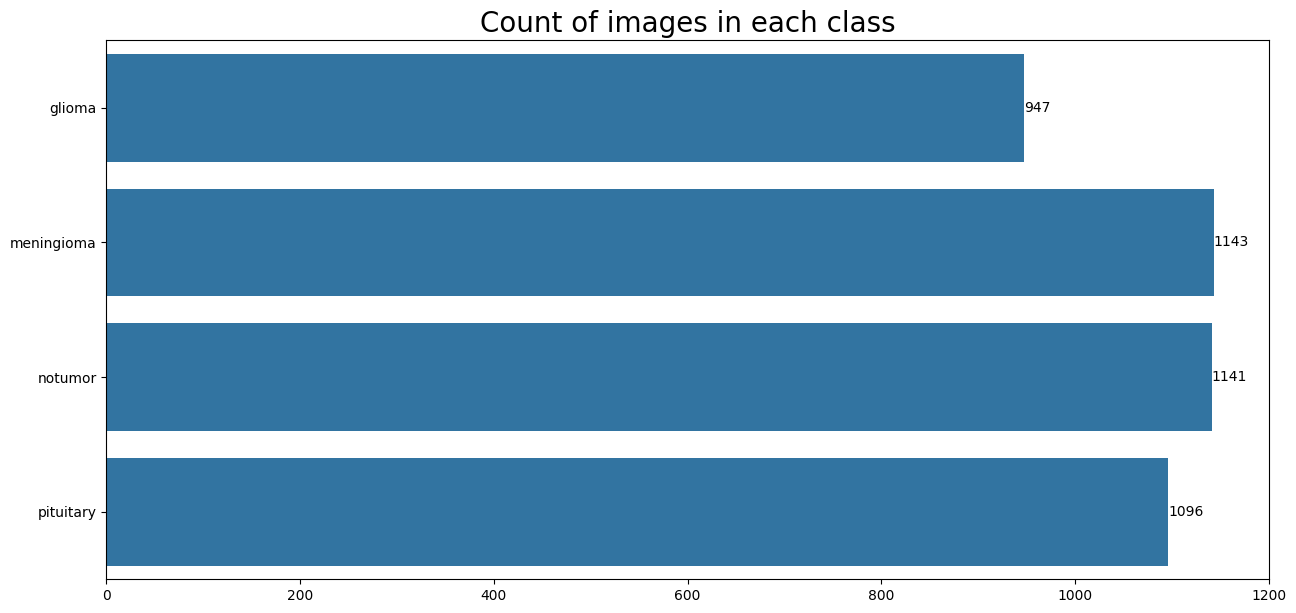

In [14]:
# Count of images in each class in train data
plt.figure(figsize=(15,7))
ax = sns.countplot(data=test_data , y=test_data ['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()


In [15]:
# Image size
image_size = (160, 160)

# Training batch size
batch_size = 32

In [16]:
!pip install opencv-python

In [17]:
# Data preprocessing without any augmentation, only rescaling and validation split
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.5)

# Creating training data generator
train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(160, 160),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    subset='training',
                                                    seed=42)

# Creating validation data generator
val_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=(160, 160),
                                                  batch_size=32,
                                                  class_mode='categorical',
                                                  subset='validation',
                                                 shuffle=False,
                                                  seed=42)

# Applying the generator to testing data, only rescaling
test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=(160, 160),
                                                  batch_size=32,
                                                  class_mode='categorical',
                                                  subset='training',  # Uses the other 50% intended for testing
                                                  shuffle=False,
                                                  seed=42
                                                 )

Found 16988 images belonging to 4 classes.
Found 2162 images belonging to 4 classes.
Found 2165 images belonging to 4 classes.


In [18]:
# Visualization function
def show_ImageDataGenerator(data_generator, num_samples=5, figsize=(12, 12), save=False):
    """
    Function to visualize how the ImageDataGenerator augments the data
    """
    # Generate augmented samples
    images, _ = next(data_generator)
    
    # Plot the images
    fig, axes = plt.subplots(1, num_samples, figsize=figsize)
    for i in range(num_samples):
        axes[i].imshow(images[i])
        axes[i].axis('off')
    
    if save:
        plt.savefig('show_ImageDataGenerator.pdf')
    
    plt.show()


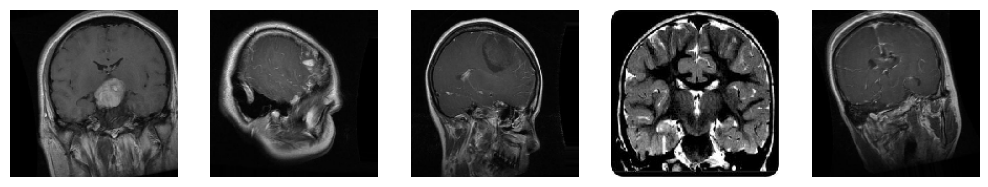

In [19]:
show_ImageDataGenerator(train_generator, num_samples=5, figsize=(12.5, 8), save=False)


In [20]:
# Image shape: height, width, RBG
image_shape = (image_size[0], image_size[1], 3)


print(f'Image shape: {image_shape}')
print(f'Batch size: {batch_size}')
print(f'Number of Train batches: {len(train_generator)}')
print(f'Number of Validation batches: {len(val_generator)}')
print(f'Number of Testing batches: {len(test_generator)}')

Image shape: (160, 160, 3)
Batch size: 32
Number of Train batches: 531
Number of Validation batches: 68
Number of Testing batches: 68


In [21]:
Classes_Map = train_generator.class_indices

num_classes = len(Classes_Map)

print("Number of Classes:", num_classes)
Classes_Map

Number of Classes: 4


{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [22]:
def plot_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.figure(figsize=(15,5))
  plt.style.use('ggplot')


  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, 'bo-' , label = "TrainL oss")
  plt.plot(epochs, val_loss, 'o-' , color='orange', label = "Val Loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()


  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, 'bo-' , label = "Train Acc")
  plt.plot(epochs, val_accuracy, 'o-' , color='orange' , label = "Val Acc")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

  plt.style.use('default')

In [23]:
def CM(model, test_generator, categories):
    """
    Function to return the confusion matrix of a given CNN model.
    """
    from sklearn.metrics import confusion_matrix
    # Predictions on test dataset
    predictions = model.predict(test_generator)
    predicted_categories = np.argmax(predictions, axis=1)
    true_categories = test_generator.classes

    # Create a confusion matrix
    confusion_matrix_array = confusion_matrix(true_categories, predicted_categories)
    print(f"Classification Report for {model}:")
    print(classification_report(true_categories, predicted_categories, target_names=categories))

    return confusion_matrix_array


def calculate_metrics(confusion_matrix, categories):
    """
    Function to calculate important metrics for multi-classification problems.
    """
    # Calculating 4 different metrics
    precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
    recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
    f1_score = 2 * (precision * recall) / (precision + recall)
    accuracy = np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)

    # Printing the results based on each category
    for i, category in enumerate(categories):
        print(f"Class: {category.title()}")
        print(f"Precision: {precision[i]:.3f}")
        print(f"Recall: {recall[i]:.3f}")
        print(f"F1-Score: {f1_score[i]:.3f}\n")

    # Showing the total accuracy of the model
    print(f"\nAccuracy: {accuracy:.3f}")

In [24]:
### import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import LearningRateScheduler

def residual_block(x, filters, stride=1, dropout_rate=0.3):
    shortcut = x

    # First convolutional layer with L2 regularization and dropout
    x = layers.Conv2D(filters, kernel_size=3, strides=stride, padding="same", use_bias=False,
                      kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Dropout(dropout_rate)(x)

    # Second convolutional layer with L2 regularization
    x = layers.Conv2D(filters, kernel_size=3, strides=1, padding="same", use_bias=False,
                      kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)

    # Adjust the shortcut path
    if stride != 1 or x.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, kernel_size=1, strides=stride, use_bias=False,
                                 kernel_regularizer=regularizers.l2(0.001))(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Combine and activate
    x = layers.add([x, shortcut])
    x = layers.ReLU()(x)
    return x
# resnet 2
def build_resnet_student(input_shape=(160, 160, 3), num_classes=4, dropout_rate=0.3):
    inputs = layers.Input(shape=input_shape)

    # Initial convolution layer
    x = layers.Conv2D(16, kernel_size=3, strides=1, padding="same", use_bias=False,
                      kernel_initializer="he_normal", kernel_regularizer=regularizers.l2(0.001))(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Residual blocks
    x = residual_block(x, 16, stride=2, dropout_rate=0.2)
    x = residual_block(x, 16, stride=1, dropout_rate=0.2)
    x = residual_block(x, 32, stride=2, dropout_rate=0.2)
    x = residual_block(x, 32, stride=1, dropout_rate=0.2)
    x = residual_block(x, 64, stride=2, dropout_rate=0.2)
    x = residual_block(x, 64, stride=1, dropout_rate=0.2)

    # Final layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = models.Model(inputs, outputs)
    return model

student_model_1 = build_resnet_student(num_classes=4)
student_model_1.summary()
student_model_1.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 160, 160, 16  432         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 160, 160, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

def tiny_xception(input_shape=(128, 128, 3), num_classes=10):
    """
    Create a tiny student model based on the Xception architecture with Dropout and L2 Regularization.
    """
    l2_reg = 1e-4  # L2 regularization factor
    dropout_rate = 0.2  # Dropout rate

    inputs = layers.Input(shape=input_shape)

    # Entry Flow
    x = layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same', 
                      use_bias=False, kernel_regularizer=regularizers.l2(l2_reg))(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(64, (3, 3), padding='same', use_bias=False, 
                      kernel_regularizer=regularizers.l2(l2_reg))(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Depthwise Separable Convolution Block
    def depthwise_separable_block(x, filters, strides=1):
        residual = x

        x = layers.DepthwiseConv2D((3, 3), strides=strides, padding='same', use_bias=False, 
                                   depthwise_regularizer=regularizers.l2(l2_reg))(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)

        x = layers.Conv2D(filters, (1, 1), padding='same', use_bias=False, 
                          kernel_regularizer=regularizers.l2(l2_reg))(x)
        x = layers.BatchNormalization()(x)

        # Adjust residual shape if needed
        if strides != 1 or residual.shape[-1] != filters:
            residual = layers.Conv2D(filters, (1, 1), strides=strides, padding='same', use_bias=False, 
                                     kernel_regularizer=regularizers.l2(l2_reg))(residual)
            residual = layers.BatchNormalization()(residual)

        x = layers.Add()([x, residual])
        return layers.ReLU()(x)

    # Middle Flow (Reduced number of blocks)
    for _ in range(2):  # Tiny model has fewer blocks
        x = depthwise_separable_block(x, 128)
        x = layers.Dropout(dropout_rate)(x)  # Dropout added here

    # Exit Flow
    x = depthwise_separable_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(dropout_rate)(x)  # Dropout before final dense layer
    x = layers.Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(l2_reg))(x)

    model = models.Model(inputs, x)
    return model

# Instantiate the model
student_model_2 = tiny_xception(input_shape=(160, 160, 3), num_classes=4)
student_model_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

student_model_2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_16 (Conv2D)             (None, 80, 80, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_16 (BatchN  (None, 80, 80, 32)  128         ['conv2d_16[0][0]']              
 ormalization)                                                                                    
                                                                                            

In [26]:
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

def dense_block(x, num_layers, growth_rate, drop_rate=0.0):
    for _ in range(num_layers):
        x = dense_layer(x, growth_rate, drop_rate=drop_rate)
    return x

def dense_layer(x, growth_rate, bottleneck_width=2, drop_rate=0.3):
    bn1 = layers.BatchNormalization()(x)
    relu1 = layers.ReLU()(bn1)
    conv1 = layers.Conv2D(
        bottleneck_width * growth_rate, 
        (1, 1), 
        padding='same', 
        use_bias=False, 
        kernel_regularizer=l2(1e-4)  # L2 Regularization
    )(relu1)
    bn2 = layers.BatchNormalization()(conv1)
    relu2 = layers.ReLU()(bn2)
    conv2 = layers.Conv2D(
        growth_rate, 
        (3, 3), 
        padding='same', 
        use_bias=False, 
        kernel_regularizer=l2(1e-4)  # L2 Regularization
    )(relu2)
    if drop_rate > 0.0:
        conv2 = layers.Dropout(drop_rate)(conv2)
    return layers.Concatenate()([x, conv2])

def transition_layer(x, reduction):
    bn = layers.BatchNormalization()(x)
    relu = layers.ReLU()(bn)
    num_filters = int(x.shape[-1] * reduction)
    conv = layers.Conv2D(
        num_filters, 
        (1, 1), 
        padding='same', 
        use_bias=False, 
        kernel_regularizer=l2(1e-4)  # L2 Regularization
    )(relu)
    return layers.AveragePooling2D((2, 2), strides=2)(conv)

def DenseNetMobile(input_shape=(160, 160, 3), num_classes=4, growth_rate=12, num_blocks=3, 
                   num_layers_per_block=[4, 8, 6], reduction=0.5, drop_rate=0.3):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(
        16, 
        (7, 7), 
        strides=2, 
        padding='same', 
        use_bias=False, 
        kernel_regularizer=l2(1e-4)  # L2 Regularization
    )(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D((3, 3), strides=2, padding='same')(x)
    for i in range(num_blocks):
        x = dense_block(x, num_layers_per_block[i], growth_rate, drop_rate=drop_rate)
        if i != num_blocks - 1:
            x = transition_layer(x, reduction)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)  # Dropout before classification
    outputs = layers.Dense(
        num_classes, 
        activation='softmax', 
        kernel_regularizer=l2(1e-4)  # L2 Regularization
    )(x)
    return Model(inputs, outputs)


student_model_3 = DenseNetMobile()

student_model_3.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)

student_model_3.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_23 (Conv2D)             (None, 80, 80, 16)   2352        ['input_3[0][0]']                
                                                                                                  
 batch_normalization_26 (BatchN  (None, 80, 80, 16)  64          ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                            

In [27]:
!pip install pickle5

  Using cached pickle5-0.0.11.tar.gz (132 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pickle5
Failed to build pickle5


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [15 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build\lib.win-amd64-cpython-310\pickle5
  copying pickle5\pickle.py -> build\lib.win-amd64-cpython-310\pickle5
  copying pickle5\pickletools.py -> build\lib.win-amd64-cpython-310\pickle5
  copying pickle5\__init__.py -> build\lib.win-amd64-cpython-310\pickle5
  creating build\lib.win-amd64-cpython-310\pickle5\test
  copying pickle5\test\pickletester.py -> build\lib.win-amd64-cpython-310\pickle5\test
  copying pickle5\test\test_pickle.py -> build\lib.win-amd64-cpython-310\pickle5\test
  copying pickle5\test\test_picklebuffer.py -> build\lib.win-amd64-cpython-310\pickle5\test
  copying pickle5\test\__init__.py -> build\lib.win-amd64-cpython-310\pickle5\test
  running build_ext
  building 'pickle5._pickle' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with 

In [28]:
from tensorflow.keras.callbacks import EarlyStopping



In [29]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

class PrintValLossAndPatience(tf.keras.callbacks.Callback):
    def __init__(self, patience):
        super().__init__()
        self.best_val_loss = float('inf')  # Start with a very high value
        self.patience = patience  # Patience parameter
        self.wait = 0  # Counter for patience

    def on_epoch_end(self, epoch, logs=None):
        val_loss = logs.get('val_loss')
        print('\n')
        if val_loss < self.best_val_loss:
            # If the validation loss improves, reset the patience counter
            self.best_val_loss = val_loss
            self.wait = 0
            print(f"Epoch {epoch+1}: Validation loss improved to {val_loss:.4f}")
        else:
            # If validation loss does not improve, increment the patience counter
            self.wait += 1
            print(f"Epoch {epoch+1}: No improvement. Patience counter: {self.wait}/{self.patience}")

        # Print when early stopping would trigger (based on patience)
        if self.wait >= self.patience:
            print(f"Patience reached. Early stopping will trigger after epoch {epoch+1}")

# Create the custom callback
print_val_loss_and_patience_callback = PrintValLossAndPatience(patience=10)

# Set up EarlyStopping and your model training
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model with both callbacks
hist_1 = student_model_1.fit(
    train_generator,
    epochs=200,
    validation_data=val_generator,
    callbacks=[early_stopping, print_val_loss_and_patience_callback],
    shuffle=False
)


Epoch 1/200
531/531 [==============================] - ETA: 0s - loss: 1.0852 - accuracy: 0.7031

Epoch 1: Validation loss improved to 1.3628
531/531 [==============================] - 128s 232ms/step - loss: 1.0852 - accuracy: 0.7031 - val_loss: 1.3628 - val_accuracy: 0.4852
Epoch 2/200
531/531 [==============================] - ETA: 0s - loss: 0.7470 - accuracy: 0.7896

Epoch 2: Validation loss improved to 0.9790
531/531 [==============================] - 43s 81ms/step - loss: 0.7470 - accuracy: 0.7896 - val_loss: 0.9790 - val_accuracy: 0.6994
Epoch 3/200
531/531 [==============================] - ETA: 0s - loss: 0.6354 - accuracy: 0.8255

Epoch 3: No improvement. Patience counter: 1/10
531/531 [==============================] - 43s 80ms/step - loss: 0.6354 - accuracy: 0.8255 - val_loss: 1.2259 - val_accuracy: 0.6230
Epoch 4/200
531/531 [==============================] - ETA: 0s - loss: 0.5610 - accuracy: 0.8523

Epoch 4: No improvement. Patience counter: 2/10
531/531 [==============

In [30]:
student_model_1.save('Tiny_Resnet_D2.h5')

In [31]:
train_score = student_model_1.evaluate(train_generator, verbose=1)
valid_score = student_model_1.evaluate(val_generator, verbose=1)
test_score = student_model_1.evaluate(test_generator, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

68/68 [==============================] - 11s 159ms/step - loss: 0.4523 - accuracy: 0.9132
Train Loss: 0.2576
Train Accuracy: 95.47%
--------------------
Validation Loss: 0.3061
Validation Accuracy: 94.13%
--------------------
Test Loss: 0.4523
Test Accuracy: 91.32%


In [32]:
import pickle

# Save the vgg_history object using pickle
with open('Tiny_Resnet_D2.pkl', 'wb') as f:
    pickle.dump(hist_1.history, f)

print("Tiny_Resnet_D2 saved successfully.")


Tiny_Resnet_D2 saved successfully.


In [33]:
# Create the custom callback
print_val_loss_and_patience_callback = PrintValLossAndPatience(patience=10)

# Set up EarlyStopping and your model training
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model with both callbacks
hist_2 = student_model_2.fit(
    train_generator,
    epochs=200,
    validation_data=val_generator,
    callbacks=[early_stopping, print_val_loss_and_patience_callback],
    shuffle=False
)


Epoch 1/200
531/531 [==============================] - ETA: 0s - loss: 0.9945 - accuracy: 0.6107 - precision: 0.7091 - recall: 0.4545

Epoch 1: Validation loss improved to 1.3250
531/531 [==============================] - 110s 205ms/step - loss: 0.9945 - accuracy: 0.6107 - precision: 0.7091 - recall: 0.4545 - val_loss: 1.3250 - val_accuracy: 0.3848 - val_precision: 0.4075 - val_recall: 0.2854
Epoch 2/200
531/531 [==============================] - ETA: 0s - loss: 0.8241 - accuracy: 0.6882 - precision: 0.7479 - recall: 0.5985

Epoch 2: Validation loss improved to 0.9772
531/531 [==============================] - 108s 204ms/step - loss: 0.8241 - accuracy: 0.6882 - precision: 0.7479 - recall: 0.5985 - val_loss: 0.9772 - val_accuracy: 0.6216 - val_precision: 0.6563 - val_recall: 0.5661
Epoch 3/200
531/531 [==============================] - ETA: 0s - loss: 0.7341 - accuracy: 0.7362 - precision: 0.7855 - recall: 0.6618

Epoch 3: Validation loss improved to 0.8445
531/531 [====================

In [34]:
student_model_2.save('Tiny_Xception_D2.h5')

In [36]:
train_score = student_model_2.evaluate(train_generator, verbose=1)
valid_score = student_model_2.evaluate(val_generator, verbose=1)
test_score = student_model_2.evaluate(test_generator, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

68/68 [==============================] - 4s 55ms/step - loss: 0.3023 - accuracy: 0.9164 - precision: 0.9240 - recall: 0.9099
Train Loss: 0.1356
Train Accuracy: 97.41%
--------------------
Validation Loss: 0.2117
Validation Accuracy: 94.77%
--------------------
Test Loss: 0.3023
Test Accuracy: 91.64%


In [37]:
with open('Tiny_Xception_D2.pkl', 'wb') as f:
    pickle.dump(hist_2.history, f)

print("Tiny_Xception_D2 saved successfully.")

Tiny_Xception_D2 saved successfully.


In [38]:
# Create the custom callback
print_val_loss_and_patience_callback = PrintValLossAndPatience(patience=10)

# Set up EarlyStopping and your model training
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model with both callbacks
hist_3 = student_model_3.fit(
    train_generator,
    epochs=200,
    validation_data=val_generator,
    callbacks=[early_stopping, print_val_loss_and_patience_callback],
    shuffle=False
)


Epoch 1/200
531/531 [==============================] - ETA: 0s - loss: 1.1246 - accuracy: 0.5607 - precision_1: 0.6969 - recall_1: 0.3467

Epoch 1: Validation loss improved to 1.3447
531/531 [==============================] - 38s 68ms/step - loss: 1.1246 - accuracy: 0.5607 - precision_1: 0.6969 - recall_1: 0.3467 - val_loss: 1.3447 - val_accuracy: 0.4556 - val_precision_1: 0.4810 - val_recall_1: 0.3927
Epoch 2/200
531/531 [==============================] - ETA: 0s - loss: 0.8948 - accuracy: 0.6747 - precision_1: 0.7456 - recall_1: 0.5635

Epoch 2: Validation loss improved to 1.0826
531/531 [==============================] - 35s 66ms/step - loss: 0.8948 - accuracy: 0.6747 - precision_1: 0.7456 - recall_1: 0.5635 - val_loss: 1.0826 - val_accuracy: 0.6036 - val_precision_1: 0.6374 - val_recall_1: 0.5569
Epoch 3/200
531/531 [==============================] - ETA: 0s - loss: 0.7739 - accuracy: 0.7357 - precision_1: 0.7851 - recall_1: 0.6566

Epoch 3: Validation loss improved to 1.0508
531/5

In [39]:
student_model_3.save('Tiny_Densenet_D2.h5')

In [40]:
with open('Tiny_Densenet_D2.pkl', 'wb') as f:
    pickle.dump(hist_3.history, f)

print("Tiny_Densenet_D2 saved successfully.")

Tiny_Densenet_D2 saved successfully.


In [41]:
train_score = student_model_3.evaluate(train_generator, verbose=1)
valid_score = student_model_3.evaluate(val_generator, verbose=1)
test_score = student_model_3.evaluate(test_generator, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

68/68 [==============================] - 3s 42ms/step - loss: 0.7241 - accuracy: 0.7940 - precision_1: 0.8119 - recall_1: 0.7737
Train Loss: 0.5311
Train Accuracy: 83.22%
--------------------
Validation Loss: 0.6903
Validation Accuracy: 76.27%
--------------------
Test Loss: 0.7241
Test Accuracy: 79.40%
